In [2]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [3]:
#!pip3 install scikit-learn==1.3.2

In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.1.post1.


## Regression - Polynomial features

In [5]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Creating the data matrix

In [6]:
D = california.data
y = california.target
n,d = D.shape
print(n,d)

20640 8


Creating a design matrix with polynomial features

In [7]:
from sklearn.preprocessing import PolynomialFeatures
aff = PolynomialFeatures(2,include_bias=True)
X = aff.fit_transform(D)
aff.get_feature_names_out(california.feature_names)

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [8]:
for i in  range(len(aff.get_feature_names_out(california.feature_names))):
    if aff.get_feature_names_out(california.feature_names)[i] == 'MedInc':
        print('MedInc: ' + str(i))
    if aff.get_feature_names_out(california.feature_names)[i] == 'MedInc AveBedrms':
        print('MedInc AveBedrms: ' + str(i))
    if aff.get_feature_names_out(california.feature_names)[i] == 'HouseAge AveBedrms':
        print('HouseAge AveBedrms:' + str(i))

MedInc: 1
MedInc AveBedrms: 12
HouseAge AveBedrms:19


In [9]:
xtx = np.dot(X.T,X)

In [10]:
beta = np.dot(np.dot(np.linalg.inv(xtx), X.T), y)

In [11]:
beta[1], beta[12], beta[19]

(-11.24302574670591, -0.18614227439126382, 0.010611506550156049)

In [12]:
l = 0.1
beta1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + l * np.eye(45)), X.T), y)

In [13]:
beta1[1], beta1[12], beta1[19]

(-9.339969801459489, -0.1496788729236941, 0.016655234701309207)

## Naive Bayes
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [14]:
from sklearn.datasets import fetch_20newsgroups
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [15]:
print(train.data[0])

From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: $ 80 SVX OIL CHANGE
 
Organization: University of Waterloo
Lines: 17





 My friend brought a subaru SVX recently.  I had drove it for couples times and I
think its a great car, esp on snow.  However when she took it to a local Subaru
dealer for a oil change, the bill came out to be about 80 dollars.  The dealer
told us it is because to change the oil filter on a SVX it is necessary to
disassemble a metal cover under the engine and that took an hour of labour.
At first, we think we are being ripped off so she phone to a dealer in Toronto
but found out the they are charging roughly the same price.  So is there any
SVX owner out there that has the same problem ?  And if the oil change story is
true, then the engineer of Subaru looks pretty stubid to me. By the way, the car
looks great.

SWD Wan.




The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [16]:
y_train = train.target
y_train

array([0, 3, 0, ..., 3, 1, 2], dtype=int64)

In [17]:
train.target_names

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Niki\AppData\Local\Temp\ipykernel_16092\3555106775.py:2: SyntaxWarning: invalid escape sequence '\W'
  vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)


We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [19]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aamir', ..., 'zubov', 'zx', 'zz'], dtype=object)

In [20]:
num_features = len(vectorizer.get_feature_names_out())

For example, the word `naive` has the index 4044.

In [21]:
naive_id = np.where(vectorizer.get_feature_names_out() == 'naive')[0]
naive_id

array([4299], dtype=int64)

In [22]:
y0 = len([a for a in y_train if a == 0])/len(y_train)
y1 = len([a for a in y_train if a == 1])/len(y_train)
y2 = len([a for a in y_train if a == 2])/len(y_train)
y3 = len([a for a in y_train if a == 3])/len(y_train)

y0, y1, y2, y3

(0.2486395981582252,
 0.2503139388865634,
 0.24989535370447885,
 0.25115110925073253)

In [23]:
alpha = 1e-5
x1y0 = np.log((len([i for i in range(len(y_train)) if y_train[i] == 0 and D[i, naive_id] == 1]) + alpha)/(y0 + alpha * num_features))
x1y1 = np.log((len([i for i in range(len(y_train)) if y_train[i] == 1 and D[i, naive_id] == 1]) + alpha)/(y1 + alpha * num_features))
x1y2 = np.log((len([i for i in range(len(y_train)) if y_train[i] == 2 and D[i, naive_id] == 1]) + alpha)/(y2 + alpha * num_features))
x1y0, x1y1, x1y2

(1.1328113356083243, 1.8207692537937494, 1.1289206212980532)

## Decision Tree

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
def gini_imp(y):
    temp = 0
    for i in range(3):
        temp += (len([a for a in y if a == i])/len(y))**2
    g_impurity = 1 - temp
    return g_impurity

In [27]:
gini_imp(y)

0.6666666666666667

In [28]:
D[0]

array([5.1, 3.5, 1.4, 0.2])

In [29]:
small_sep_id = []
big_sep_id = []
for i in range(150):
    if(D[i][0] <= 5.84):
        small_sep_id.append(i)
    else:
        big_sep_id.append(i)
#print(small_sep_id)
#print(big_sep_id)
y_small = [y[j] for j in small_sep_id]
y_big = [y[j] for j in big_sep_id]
#print(gini_imp(y_small))
#print(gini_imp(y_big))
cost = (len(small_sep_id)/150 * gini_imp(y_small) + len(big_sep_id)/150 * gini_imp(y_big)) - gini_imp(y)
print(cost)

-0.17476190476190478


## SVM

In [30]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

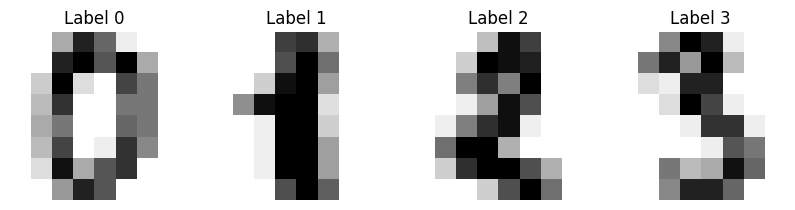

In [31]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [32]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [33]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma=0.0008, C=0.9)
model = svc.fit(D_train, y_train)
print(svc.score(D_test, y_test))

0.9629629629629629


In [34]:
# Calculate how many supporting vectors classes 0 and 1 have in total
# Supporting vectors between other classes are included
supporting_vectors = svc.n_support_
all_supporting_vectors_0_1 = supporting_vectors[0] + supporting_vectors[1]
all_supporting_vectors_0_1

112